In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


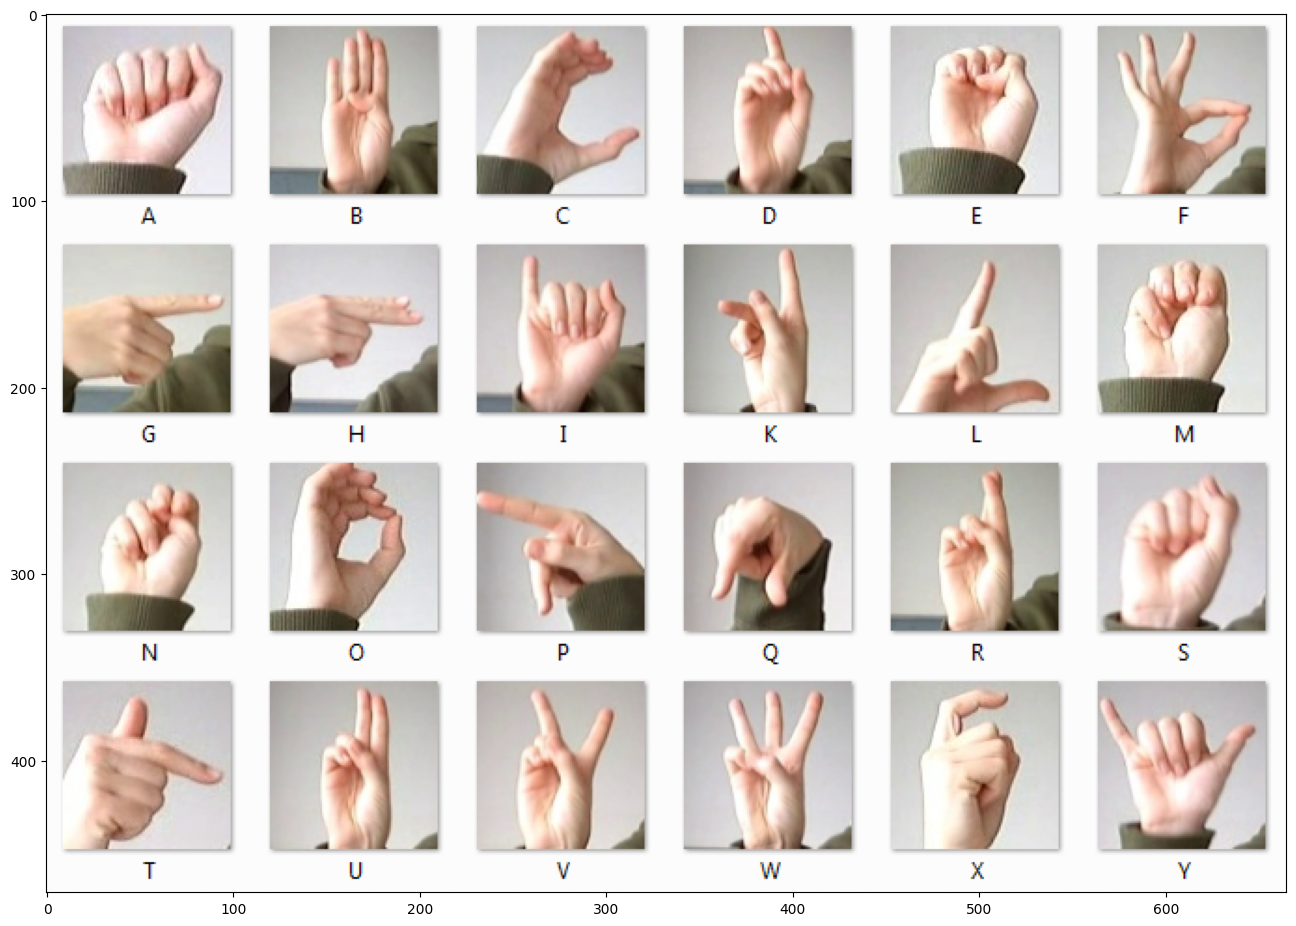

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))
img = plt.imread('/content/drive/MyDrive/sync intern/week four/data/amer_sign2.png')
plt.imshow(img)
plt.show()

# 1- Importing all neccesary librarys


First we import our libraries that will we need.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

# 2- Prepare Data
Import **train** and **test** data as dataframes.

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/sync intern/week four/data/sign_mnist_train/sign_mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
df_test = pd.read_csv('/content/drive/MyDrive/sync intern/week four/data/sign_mnist_test/sign_mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


The classes of data and their number of images.

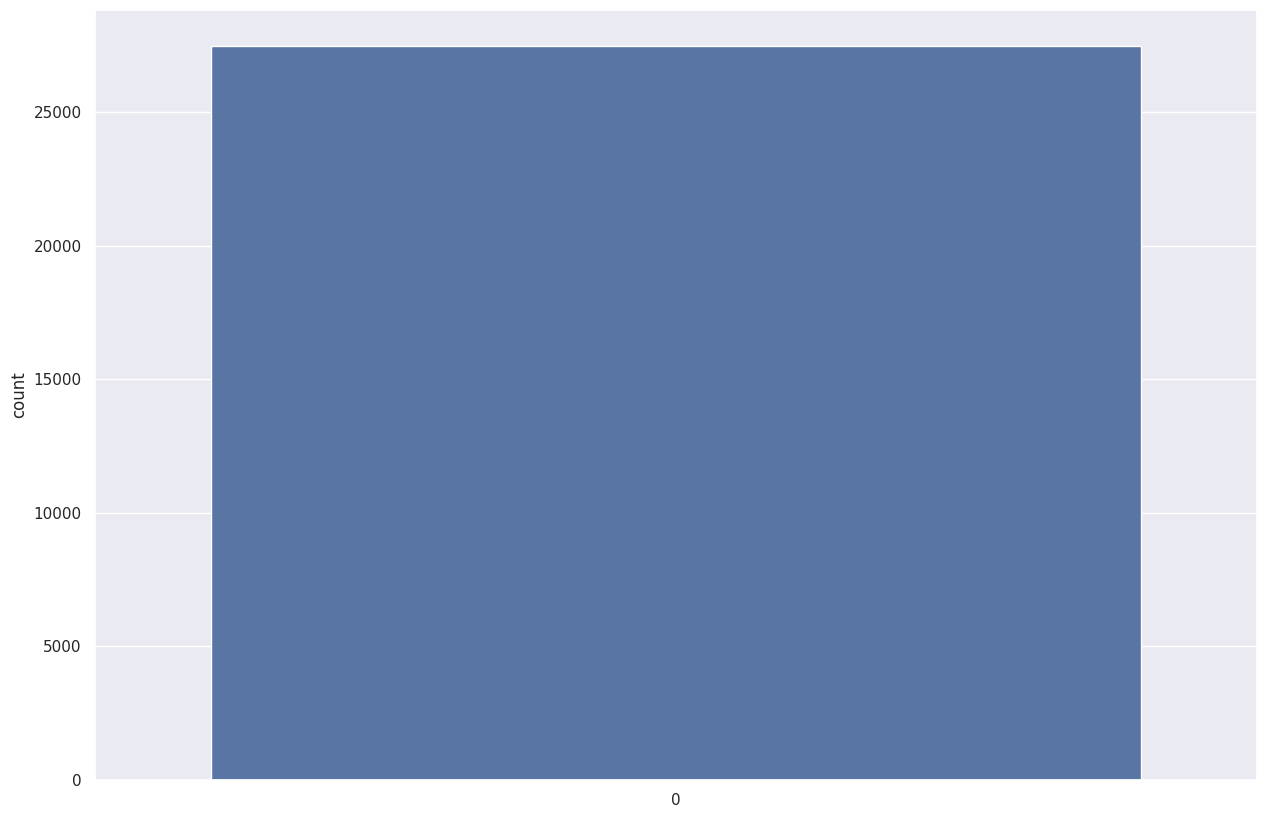

In [6]:
plt.figure(figsize = (15,10))
sns.set_style("darkgrid")
sns.countplot(df_train['label'])
plt.show()

Let's split the **label** column from train and test data frames.

In [7]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace=True)
df_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


Define the size of image and its channel, batch size  and the number of epochs.

In [9]:
size  = 28
channels = 1
batch = 128
epochs = 100

Reshape the data to make images ready for **ImageDataGenerator**:
> reshape(number of rows, img width, img height, channels)

In [10]:
X_train = df_train.values.reshape(df_train.shape[0], size, size, channels)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (27455, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)


# 3- Data Augmentation
Let's make augmentation on training data and only scaling validation and test data.

In [11]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

datagenRescale = ImageDataGenerator(rescale=1./255)

X_train = datagen.flow(X_train, y_train, batch_size=batch)

X_test = datagenRescale.flow(X_test, y_test)

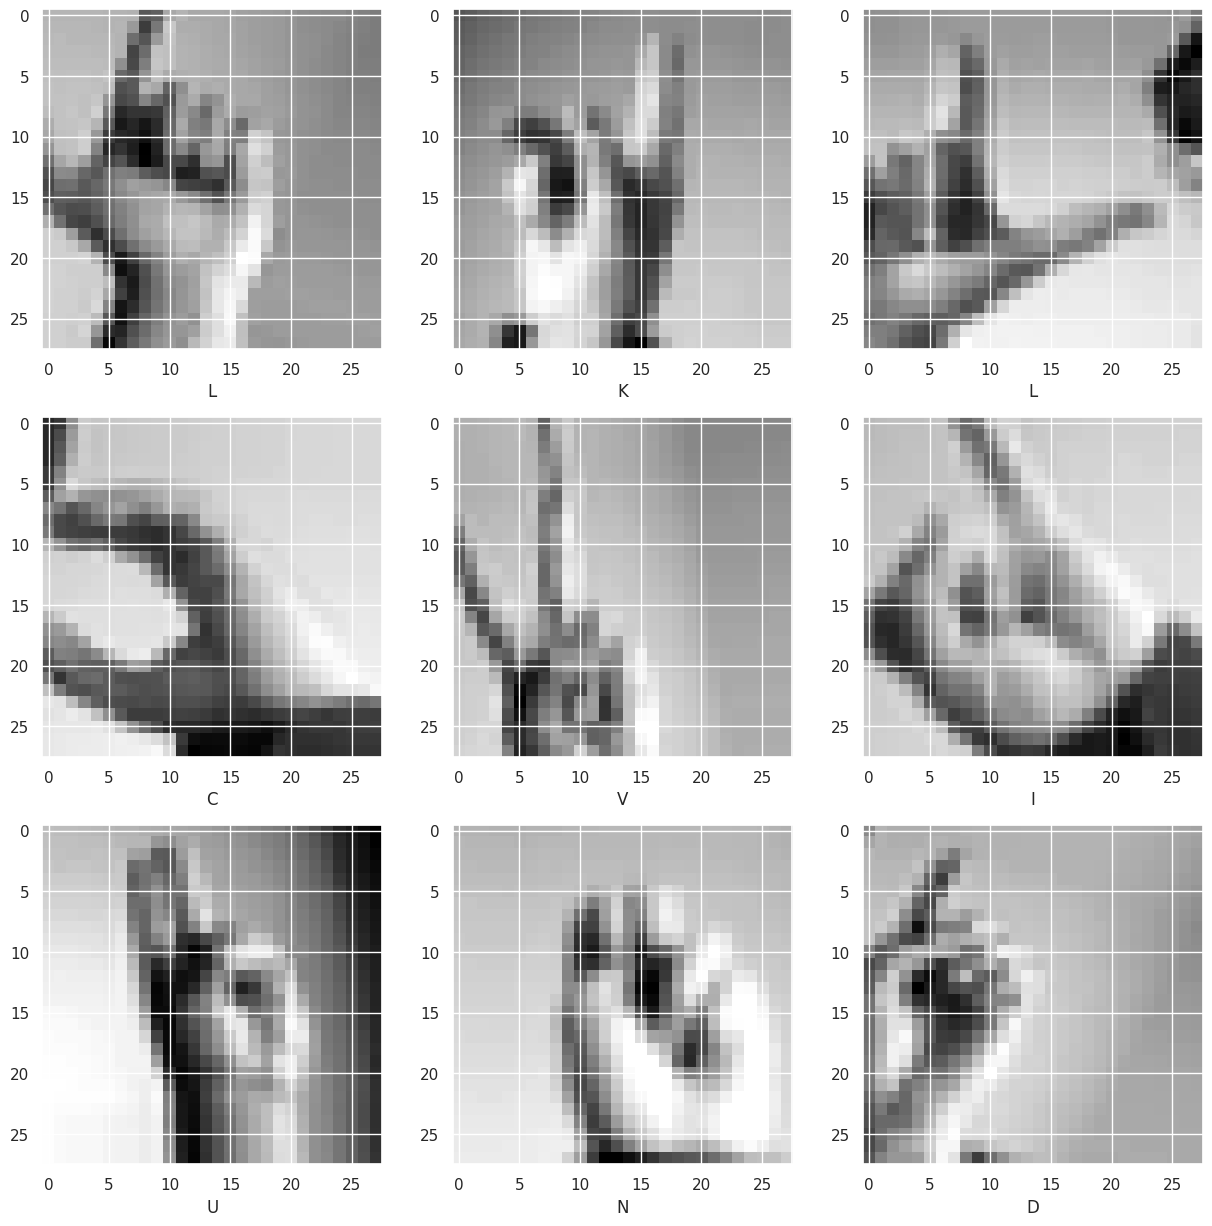

In [12]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in X_train:
        image = X_batch[i]
        plt.imshow(image, cmap='gray')
        plt.xlabel(alphabet[Y_batch[i]])
        break
plt.show()

# 4- Setup Callbacks

In [13]:
checkpoint_filepath = 'best_model.hdf5'

callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)

callbacks = [callback_checkpoint, callback_learningrate]

# 5- Desighn the Neural Network

In [14]:
Model = Sequential([Conv2D(filters=32,  kernel_size=(3,3), activation="relu", input_shape=(size,size,channels)),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                 
                    Conv2D(filters=128,  kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                
                    Conv2D(filters=512, kernel_size=(3,3), activation="relu"),
                    MaxPool2D(2,2, padding='same'),
                    Dropout(0.2),
                    
                    
                    Flatten(),
                    
                    Dense(units=4096, activation="relu"),                 
                    Dropout(0.2),
                    
                    Dense(units=1024, activation="relu"),
                    Dropout(0.2),
                                  
                    Dense(units=256, activation="relu"),
                    Dropout(0.2),
                    
                    Dense(units=25, activation="softmax"),
])


Model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])


Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

# 6-training the model

In [16]:
history = Model.fit(X_train, validation_data=X_test, epochs=20, callbacks=callbacks)

Epoch 1/20
215/215 [==============================] - 232s 1s/step - loss: 3.1365 - accuracy: 0.0588 - val_loss: 2.8853 - val_accuracy: 0.0930 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 229s 1s/step - loss: 2.6183 - accuracy: 0.1643 - val_loss: 2.1791 - val_accuracy: 0.2398 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 226s 1s/step - loss: 1.9205 - accuracy: 0.3463 - val_loss: 1.1263 - val_accuracy: 0.6161 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 224s 1s/step - loss: 1.4374 - accuracy: 0.5030 - val_loss: 0.7620 - val_accuracy: 0.7348 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 231s 1s/step - loss: 1.1296 - accuracy: 0.6022 - val_loss: 0.5461 - val_accuracy: 0.8118 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 231s 1s/step - loss: 0.9143 - accuracy: 0.6794 - val_loss: 0.4273 - val_accuracy: 0.8364 - lr: 0.0010
Epoch 7/20
215/215 [==============================] - 230s 1s/st

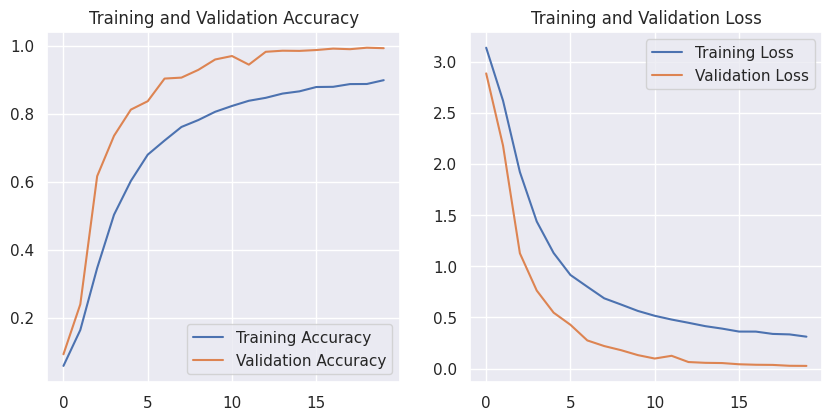

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 8- evaluate

In [23]:
score = Model.evaluate(X_test) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

225/225 [==============================] - 17s 75ms/step - loss: 0.0255 - accuracy: 0.9922
Test loss: 0.02549726702272892
Test accuracy: 0.9921918511390686


# 9- Confusion Matrix

In [24]:
df_test = pd.read_csv('/content/drive/MyDrive/sync intern/week four/data/sign_mnist_test/sign_mnist_test.csv')
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace=True)
X_test = df_test.values.reshape(df_test.shape[0], size, size, channels)

In [25]:
y_pred = np.argmax(Model.predict(X_test),axis = 1) 

225/225 [==============================] - 12s 53ms/step


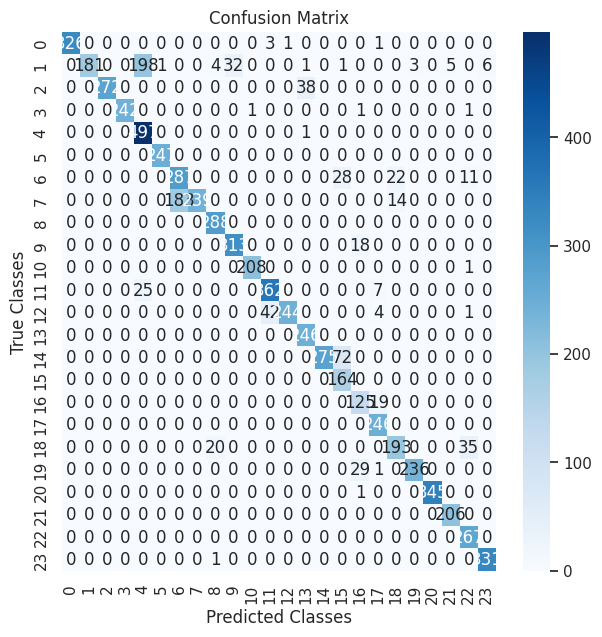

In [29]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,7))
sns.heatmap(CM, annot=True, cmap="Blues", fmt = 'g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

# 10-  Check

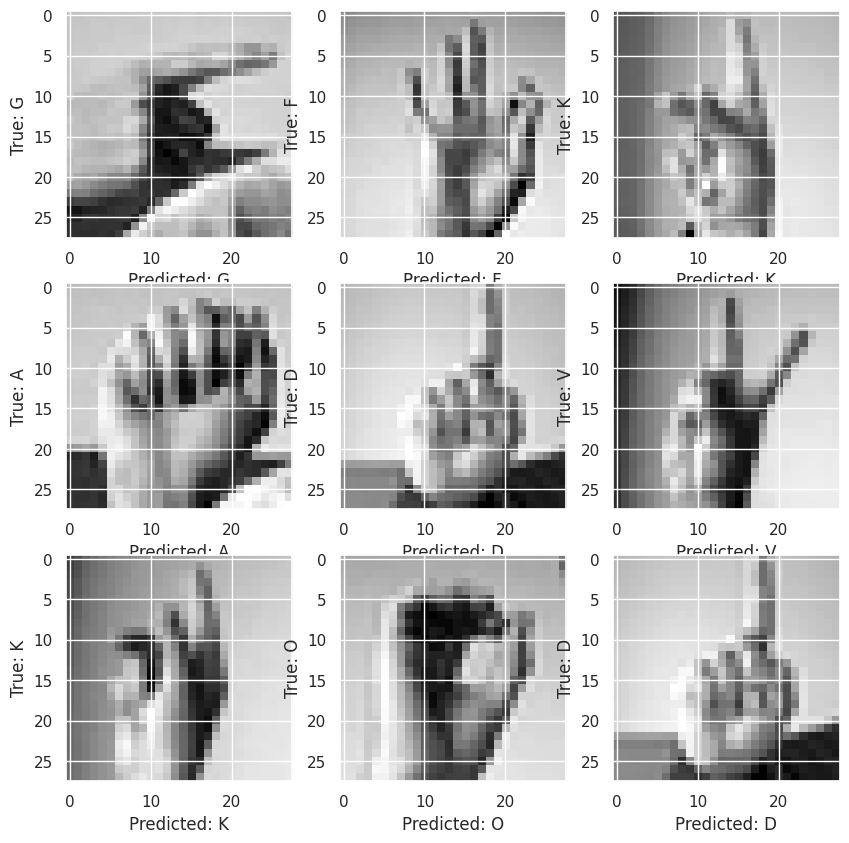

In [30]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.ylabel(f"True: {alphabet[y_test[i]]}")
    plt.xlabel(f"Predicted: {alphabet[y_pred[i]]}")
    
plt.show()